In [57]:
#import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import dataframe_image as dfi

# chicago crime data file
crime_path = "Resources/chicago_crimes_all_cleaned.csv"

# Read the mouse data and put into a dataframe
crime = pd.read_csv(crime_path)
crime_df = pd.DataFrame(crime)

# Display the data table for preview
crime_df.head()

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Location,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,"(41.689078832, -87.696064026)",28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,"(41.740520866, -87.647390719)",68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,"(41.857068095, -87.657625201)",79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,"(41.75191443, -87.647716532)",68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,"(41.87568438, -87.760479356)",47712.0,60644.0


In [58]:
#get data types for formatting later
crime_df.dtypes

Case Number      object
Date             object
Block            object
Primary Type     object
Description      object
District          int64
Ward            float64
Year              int64
Latitude        float64
Longitude       float64
Location         object
Population      float64
Zipcode         float64
dtype: object

In [59]:
#list all the columns available in the df
crime_df.columns

Index(['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'District', 'Ward', 'Year', 'Latitude', 'Longitude', 'Location',
       'Population', 'Zipcode'],
      dtype='object')

In [60]:
#remove unnecessary columns
crime_cleaned_df = crime_df[["Case Number", "Date", "Block", "Primary Type", "Description", "District", "Ward",
                                     "Year", "Latitude", "Longitude","Population","Zipcode"]]
crime_cleaned_df.head()

,Case Number,Date,Block,Primary Type,Description,District,Ward,Year,Latitude,Longitude,Population,Zipcode
0,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,MINOR PROPERTY CRIME,TO VEHICLE,22,19.0,2018,41.689079,-87.696064,28804.0,60655.0
1,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,MINOR PROPERTY CRIME,TO PROPERTY,6,21.0,2018,41.740521,-87.647391,68096.0,60620.0
2,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,12,25.0,2018,41.857068,-87.657625,79205.0,60608.0
3,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,6,17.0,2018,41.751914,-87.647717,68096.0,60620.0
4,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,15,29.0,2018,41.875684,-87.760479,47712.0,60644.0


In [61]:
#split the cleaned data into dataframes by year for finding total population counts by year
df_2018 = crime_cleaned_df[crime_cleaned_df["Year"]==2018]
df_2019 = crime_cleaned_df[crime_cleaned_df["Year"]==2019]
df_2020 = crime_cleaned_df[crime_cleaned_df["Year"]==2020]
df_2021 = crime_cleaned_df[crime_cleaned_df["Year"]==2021]
df_2022 = crime_cleaned_df[crime_cleaned_df["Year"]==2022]

In [ ]:
#create a dataframe containing the population for each year
years = crime_cleaned_df["Year"].unique()
population = [df_2018.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2019.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2020.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2021.groupby("Zipcode")["Population"].unique().sum().sum(),
              df_2022.groupby("Zipcode")["Population"].unique().sum().sum()]
pop_average = np.array(population).mean()
pop_by_year = {years[0]:population[0],years[1]:population[1],
               years[2]:population[2],years[3]:population[3],
               years[4]:population[4],"Average":pop_average}
pop_no_average = {years[0]:population[0],years[1]:population[1],
               years[2]:population[2],years[3]:population[3],
               years[4]:population[4]}


In [63]:
#get the counts of the "Primary Type" of crime committed
counts_crime = crime_cleaned_df["Primary Type"].value_counts()
counts_crime

THEFT (ALL TYPES)                   477272
ASSAULT & BATTERY                   319103
MINOR PROPERTY CRIME                153631
OTHER MINOR CRIMES                   86070
DRUG RELATED                         42819
WEAPONS RELATED CRIME                38258
SEXUAL RELATED CRIME                 12405
OFFENSE INVOLVING CHILDREN            9795
HOMICIDE                              3406
ARSON                                 2237
KIDNAPPING AND HUMAN TRAFFICKING       703
NON-CRIMINAL (SUBJECT SPECIFIED)         3
Name: Primary Type, dtype: int64

In [64]:
# Group categories of crime by year
types_grouped = crime_cleaned_df.groupby(["Primary Type","Year"])[["Case Number"]].count().sort_values(by=["Primary Type","Year"])
types_df = pd.DataFrame(types_grouped)
types_df.head()

Case Number
Primary Type Year             
ARSON        2018          368
             2019          365
             2020          574
             2021          518
             2022          412

In [65]:
#Get counts by year for each type and put into dictionaries
arson_count = types_df.loc["ARSON","Case Number"]
arson = dict(arson_count)
total_arson = arson_count.sum()
arson["Totals"]=total_arson
assault_count = types_df.loc["ASSAULT & BATTERY","Case Number"]
assault = dict(assault_count)
total_assault = assault_count.sum()
assault["Totals"]=total_assault
drug_count = types_df.loc["DRUG RELATED","Case Number"]
drug = dict(drug_count)
total_drug = drug_count.sum()
drug["Totals"]=total_drug
homicide_count = types_df.loc["HOMICIDE","Case Number"]
homicide = dict(homicide_count)
total_homicide = homicide_count.sum()
homicide["Totals"]=total_homicide
kidnap_count = types_df.loc["KIDNAPPING AND HUMAN TRAFFICKING","Case Number"]
kidnap = dict(kidnap_count)
total_kidnap = kidnap_count.sum()
kidnap["Totals"]=total_kidnap
non_crim_count = types_df.loc["NON-CRIMINAL (SUBJECT SPECIFIED)","Case Number"]
non_crim = dict(non_crim_count)
total_non_crim = non_crim_count.sum()
non_crim["Totals"]=total_non_crim
children_count = types_df.loc["OFFENSE INVOLVING CHILDREN","Case Number"]
children = dict(children_count)
total_children = children_count.sum()
children["Totals"]=total_children
other_minor_count = types_df.loc["OTHER MINOR CRIMES","Case Number"]
other_minor = dict(other_minor_count)
total_other_minor = other_minor_count.sum()
other_minor["Totals"]=total_other_minor
sex_crime_count = types_df.loc["SEXUAL RELATED CRIME","Case Number"]
sex_crime = dict(sex_crime_count)
total_sex_crime = sex_crime_count.sum()
sex_crime["Totals"]=total_sex_crime
theft_count = types_df.loc["THEFT (ALL TYPES)","Case Number"]
theft = dict(theft_count)
total_theft = theft_count.sum()
theft["Totals"]=total_theft
weapons_count = types_df.loc["WEAPONS RELATED CRIME","Case Number"]
weapons = dict(weapons_count)
total_weapons = weapons_count.sum()
weapons["Totals"]=total_weapons


In [121]:
#get value count arrays for each year and for totals
counts_crime = crime_cleaned_df["Year"].value_counts().sort_index()
crime_counts = counts_crime.to_dict()
crime_counts["Totals"] = counts_crime.sum()


In [143]:
#create a df of all the counts by type and year
clean_types = {"ARSON":arson,"ASSAULT":assault,
               "DRUG RELATED":drug,"HOMICIDE":homicide,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim,
               "OFFENSE INVOLVING CHILDREN":children,
               "OTHER MINOR CRIMES":other_minor,
               "SEXUAL RELATED CRIME":sex_crime,
               "THEFT (ALL TYPES)":theft,
               "WEAPONS RELATED CRIME":weapons,
               "ALL CRIMES":crime_counts}
clean_types_df = pd.DataFrame(clean_types)

#format the values to have commas
clean_types_df["ARSON"] = clean_types_df["ARSON"].map("{:,.0f}".format)
clean_types_df["ASSAULT"] = clean_types_df["ASSAULT"].map("{:,.0f}".format)
clean_types_df["DRUG RELATED"] = clean_types_df["DRUG RELATED"].map("{:,.0f}".format)
clean_types_df["HOMICIDE"] = clean_types_df["HOMICIDE"].map("{:,.0f}".format)
clean_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"] = clean_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"].map("{:,.0f}".format)
clean_types_df["OFFENSE INVOLVING CHILDREN"] = clean_types_df["OFFENSE INVOLVING CHILDREN"].map("{:,.0f}".format)
clean_types_df["OTHER MINOR CRIMES"] = clean_types_df["OTHER MINOR CRIMES"].map("{:,.0f}".format)
clean_types_df["SEXUAL RELATED CRIME"] = clean_types_df["SEXUAL RELATED CRIME"].map("{:,.0f}".format)
clean_types_df["THEFT (ALL TYPES)"] = clean_types_df["THEFT (ALL TYPES)"].map("{:,.0f}".format)
clean_types_df["WEAPONS RELATED CRIME"] = clean_types_df["WEAPONS RELATED CRIME"].map("{:,.0f}".format)
clean_types_df["ALL CRIMES"] = clean_types_df["ALL CRIMES"].map("{:,.0f}".format)

dfi.export(clean_types_df,'Images/typecounts_all.png')
clean_types_df


OSError: read past end of file

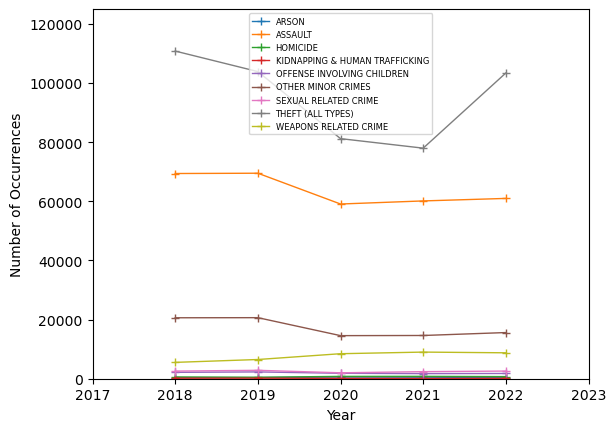

In [45]:
#add a time series for the raw count of all types
years = crime_cleaned_df["Year"].unique()
plt.plot(years,arson_count,marker="+",linewidth=1,label="ARSON")
plt.plot(years,assault_count,marker="+",linewidth=1,label="ASSAULT")
plt.plot(years,drug_count,marker="+",linewidth=1,label="DRUG RELATED")
plt.plot(years,homicide_count,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_count,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.plot(years,children_count,marker="+",linewidth=1,label="OFFENSE INVOLVING CHILDREN")
plt.plot(years,other_minor_count,marker="+",linewidth=1,label="OTHER MINOR CRIMES")
plt.plot(years,sex_crime_count,marker="+",linewidth=1,label="SEXUAL RELATED CRIME")
plt.plot(years,theft_count,marker="+",linewidth=1,label="THEFT (ALL TYPES)")
plt.plot(years,weapons_count,marker="+",linewidth=1,label="WEAPONS RELATED CRIME")
plt.xlim(2017,2023)
plt.ylim(0,125000)
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend(fontsize = 6,loc='upper center')
plt.savefig("Images/count_all_types.png")
plt.show()

In [12]:
#redefine clean_types_df with original formatting
clean_types = {"ARSON":arson,"ASSAULT":assault,
               "DRUG RELATED":drug,"HOMICIDE":homicide,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim,
               "OFFENSE INVOLVING CHILDREN":children,
               "OTHER MINOR CRIMES":other_minor,
               "SEXUAL RELATED CRIME":sex_crime,
               "THEFT (ALL TYPES)":theft,
               "WEAPONS RELATED CRIME":weapons,
               "ALL CRIMES":crime_counts}
clean_types_df = pd.DataFrame(clean_types)

#convert yearly counts into percentages of crime committed that year
arson_percent = (clean_types_df["ARSON"]/clean_types_df["ALL CRIMES"])*100
assault_percent = (clean_types_df["ASSAULT"]/clean_types_df["ALL CRIMES"])*100
drug_percent = (clean_types_df["DRUG RELATED"]/clean_types_df["ALL CRIMES"])*100
homicide_percent = (clean_types_df["HOMICIDE"]/clean_types_df["ALL CRIMES"])*100
kidnap_percent = (clean_types_df["KIDNAPPING & HUMAN TRAFFICKING"]/clean_types_df["ALL CRIMES"])*100
non_crim_percent = (clean_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"]/clean_types_df["ALL CRIMES"])*100
children_percent = (clean_types_df["OFFENSE INVOLVING CHILDREN"]/clean_types_df["ALL CRIMES"])*100
other_minor_percent = (clean_types_df["OTHER MINOR CRIMES"]/clean_types_df["ALL CRIMES"])*100
sex_crime_percent = (clean_types_df["SEXUAL RELATED CRIME"]/clean_types_df["ALL CRIMES"])*100
theft_percent = (clean_types_df["THEFT (ALL TYPES)"]/clean_types_df["ALL CRIMES"])*100
weapon_percent = (clean_types_df["WEAPONS RELATED CRIME"]/clean_types_df["ALL CRIMES"])*100


In [13]:
#organize into a dictionary called types_percent
types_percent = {"ARSON":arson_percent,"ASSAULT":assault_percent,
               "DRUG RELATED":drug_percent,"HOMICIDE":homicide_percent,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap_percent,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim_percent,
               "OFFENSE INVOLVING CHILDREN":children_percent,
               "OTHER MINOR CRIMES":other_minor_percent,
               "SEXUAL RELATED CRIME":sex_crime_percent,
               "THEFT (ALL TYPES)":theft_percent,
               "WEAPONS RELATED CRIME":weapon_percent}
#create a dataframe from the dictionary
types_percent_df = pd.DataFrame(types_percent)

#format values into percentages (%)
types_percent_df["ARSON"] = types_percent_df["ARSON"].map("{:,.4f}%".format)
types_percent_df["ASSAULT"] = types_percent_df["ASSAULT"].map("{:,.4f}%".format)
types_percent_df["DRUG RELATED"] = types_percent_df["DRUG RELATED"].map("{:,.4f}%".format)
types_percent_df["HOMICIDE"] = types_percent_df["HOMICIDE"].map("{:,.4f}%".format)
types_percent_df["KIDNAPPING & HUMAN TRAFFICKING"] = types_percent_df["KIDNAPPING & HUMAN TRAFFICKING"].map("{:,.4f}%".format)
types_percent_df["NON-CRIMINAL (SUBJECT SPECIFIED)"] = types_percent_df["NON-CRIMINAL (SUBJECT SPECIFIED)"].map("{:,.4f}%".format)
types_percent_df["OFFENSE INVOLVING CHILDREN"] = types_percent_df["OFFENSE INVOLVING CHILDREN"].map("{:,.4f}%".format)
types_percent_df["OTHER MINOR CRIMES"] = types_percent_df["OTHER MINOR CRIMES"].map("{:,.4f}%".format)
types_percent_df["SEXUAL RELATED CRIME"] = types_percent_df["SEXUAL RELATED CRIME"].map("{:,.4f}%".format)
types_percent_df["THEFT (ALL TYPES)"] = types_percent_df["THEFT (ALL TYPES)"].map("{:,.4f}%".format)
types_percent_df["WEAPONS RELATED CRIME"] = types_percent_df["WEAPONS RELATED CRIME"].map("{:,.4f}%".format)

#display the dataframe
types_percent_df


,ARSON,ASSAULT,DRUG RELATED,HOMICIDE,KIDNAPPING & HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),OFFENSE INVOLVING CHILDREN,OTHER MINOR CRIMES,SEXUAL RELATED CRIME,THEFT (ALL TYPES),WEAPONS RELATED CRIME
2018,0.1421%,26.7987%,4.9024%,0.2309%,0.0683%,0.0012%,0.8321%,7.9598%,0.9966%,42.7887%,2.1346%
2019,0.1434%,27.3070%,5.8518%,0.1961%,0.0715%,nan%,0.9044%,8.1129%,1.1182%,40.8123%,2.5530%
2020,0.2810%,28.9256%,3.5379%,0.3862%,0.0597%,nan%,0.8983%,7.1336%,0.9801%,39.7504%,4.1415%
2021,0.2602%,30.2069%,2.0415%,0.4039%,0.0467%,nan%,0.8680%,7.3453%,1.1986%,39.1717%,4.5246%
2022,0.1800%,26.6443%,1.7206%,0.3128%,0.0564%,nan%,0.7756%,6.8219%,1.1317%,45.1821%,3.8297%
Totals,0.1953%,27.8522%,3.7374%,0.2973%,0.0614%,0.0003%,0.8549%,7.5124%,1.0827%,41.6576%,3.3393%


In [159]:
#redefine the percentage formulas without the last row (totals)
years_types = {"ARSON":arson_count,"ASSAULT":assault_count,
               "DRUG RELATED":drug_count,"HOMICIDE":homicide_count,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap_count,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim_count,
               "OFFENSE INVOLVING CHILDREN":children_count,
               "OTHER MINOR CRIMES":other_minor_count,
               "SEXUAL RELATED CRIME":sex_crime_count,
               "THEFT (ALL TYPES)":theft_count,
               "WEAPONS RELATED CRIME":weapons_count,
               "ALL CRIMES":counts_crime}
years_types_df = pd.DataFrame(years_types)

#convert yearly counts into percentages of crime committed that year
arson_percent_years = (years_types_df["ARSON"]/years_types_df["ALL CRIMES"])*100
assault_percent_years = (years_types_df["ASSAULT"]/years_types_df["ALL CRIMES"])*100
drug_percent_years = (years_types_df["DRUG RELATED"]/years_types_df["ALL CRIMES"])*100
homicide_percent_years = (years_types_df["HOMICIDE"]/years_types_df["ALL CRIMES"])*100
kidnap_percent_years = (years_types_df["KIDNAPPING & HUMAN TRAFFICKING"]/years_types_df["ALL CRIMES"])*100
non_crim_percent_years = (years_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"]/years_types_df["ALL CRIMES"])*100
children_percent_years = (years_types_df["OFFENSE INVOLVING CHILDREN"]/years_types_df["ALL CRIMES"])*100
other_minor_percent_years = (years_types_df["OTHER MINOR CRIMES"]/years_types_df["ALL CRIMES"])*100
sex_crime_percent_years = (years_types_df["SEXUAL RELATED CRIME"]/years_types_df["ALL CRIMES"])*100
theft_percent_years = (years_types_df["THEFT (ALL TYPES)"]/years_types_df["ALL CRIMES"])*100
weapon_percent_years = (years_types_df["WEAPONS RELATED CRIME"]/years_types_df["ALL CRIMES"])*100


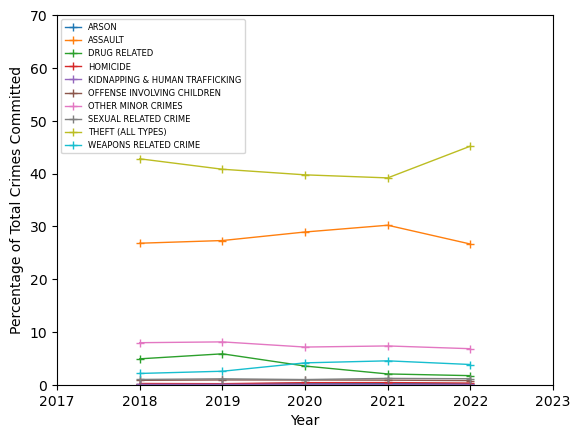

In [81]:
#add a time series for the percentages by year
years = crime_cleaned_df["Year"].unique()
plt.plot(years,arson_percent_years,marker="+",linewidth=1,label="ARSON")
plt.plot(years,assault_percent_years,marker="+",linewidth=1,label="ASSAULT")
plt.plot(years,drug_percent_years,marker="+",linewidth=1,label="DRUG RELATED")
plt.plot(years,homicide_percent_years,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_percent_years,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.plot(years,children_percent_years,marker="+",linewidth=1,label="OFFENSE INVOLVING CHILDREN")
plt.plot(years,other_minor_percent_years,marker="+",linewidth=1,label="OTHER MINOR CRIMES")
plt.plot(years,sex_crime_percent_years,marker="+",linewidth=1,label="SEXUAL RELATED CRIME")
plt.plot(years,theft_percent_years,marker="+",linewidth=1,label="THEFT (ALL TYPES)")
plt.plot(years,weapon_percent_years,marker="+",linewidth=1,label="WEAPONS RELATED CRIME")
plt.xlim(2017,2023)
plt.ylim(0,70)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Crimes Committed")
plt.legend(fontsize = 6,loc='best')
plt.savefig("Images/percent_all_types.png")
plt.show()


In [82]:
#redefine counts by year to get the mean for the 'totals column
arson_count = types_df.loc["ARSON","Case Number"]
arson = dict(arson_count)
mean_arson = arson_count.mean()
arson["Average"]=mean_arson
assault_count = types_df.loc["ASSAULT & BATTERY","Case Number"]
assault = dict(assault_count)
mean_assault = assault_count.mean()
assault["Average"]=mean_assault
drug_count = types_df.loc["DRUG RELATED","Case Number"]
drug = dict(drug_count)
mean_drug = drug_count.mean()
drug["Average"]=mean_drug
homicide_count = types_df.loc["HOMICIDE","Case Number"]
homicide = dict(homicide_count)
mean_homicide = homicide_count.mean()
homicide["Average"]=mean_homicide
kidnap_count = types_df.loc["KIDNAPPING AND HUMAN TRAFFICKING","Case Number"]
kidnap = dict(kidnap_count)
mean_kidnap = kidnap_count.mean()
kidnap["Average"]=mean_kidnap
non_crim_count = types_df.loc["NON-CRIMINAL (SUBJECT SPECIFIED)","Case Number"]
non_crim = dict(non_crim_count)
mean_non_crim = non_crim_count.mean()
non_crim["Average"]=mean_non_crim
children_count = types_df.loc["OFFENSE INVOLVING CHILDREN","Case Number"]
children = dict(children_count)
mean_children = children_count.mean()
children["Average"]=mean_children
other_minor_count = types_df.loc["OTHER MINOR CRIMES","Case Number"]
other_minor = dict(other_minor_count)
mean_other_minor = other_minor_count.mean()
other_minor["Average"]=mean_other_minor
sex_crime_count = types_df.loc["SEXUAL RELATED CRIME","Case Number"]
sex_crime = dict(sex_crime_count)
mean_sex_crime = sex_crime_count.mean()
sex_crime["Average"]=mean_sex_crime
theft_count = types_df.loc["THEFT (ALL TYPES)","Case Number"]
theft = dict(theft_count)
mean_theft = theft_count.mean()
theft["Average"]=mean_theft
weapons_count = types_df.loc["WEAPONS RELATED CRIME","Case Number"]
weapons = dict(weapons_count)
mean_weapons = weapons_count.mean()
weapons["Average"]=mean_weapons


In [89]:
#Redefine crime counts to find the mean
counts_crime = crime_cleaned_df["Year"].value_counts().sort_index()
crime_counts = counts_crime.to_dict()
crime_counts["Average"] = counts_crime.mean()
crime_counts

#define clean types once more with population totals by year
clean_types = {"ARSON":arson,"ASSAULT":assault,
               "DRUG RELATED":drug,"HOMICIDE":homicide,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim,
               "OFFENSE INVOLVING CHILDREN":children,
               "OTHER MINOR CRIMES":other_minor,
               "SEXUAL RELATED CRIME":sex_crime,
               "THEFT (ALL TYPES)":theft,
               "WEAPONS RELATED CRIME":weapons,
               "ALL CRIMES":crime_counts,
               "POPULATION":pop_by_year}
clean_types_df = pd.DataFrame(clean_types)

#find 'per capita' counts by primary type by year (raw figures)
arson_per_capita = clean_types_df["ARSON"]/clean_types_df["POPULATION"]
assault_per_capita = clean_types_df["ASSAULT"]/clean_types_df["POPULATION"]
drug_per_capita = clean_types_df["DRUG RELATED"]/clean_types_df["POPULATION"]
homicide_per_capita = clean_types_df["HOMICIDE"]/clean_types_df["POPULATION"]
kidnap_per_capita = clean_types_df["KIDNAPPING & HUMAN TRAFFICKING"]/clean_types_df["POPULATION"]
non_crim_per_capita = clean_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"]/clean_types_df["POPULATION"]
children_per_capita = clean_types_df["OFFENSE INVOLVING CHILDREN"]/clean_types_df["POPULATION"]
other_minor_per_capita = clean_types_df["OTHER MINOR CRIMES"]/clean_types_df["POPULATION"]
sex_crime_per_capita = clean_types_df["SEXUAL RELATED CRIME"]/clean_types_df["POPULATION"]
theft_per_capita = clean_types_df["THEFT (ALL TYPES)"]/clean_types_df["POPULATION"]
weapon_per_capita = clean_types_df["WEAPONS RELATED CRIME"]/clean_types_df["POPULATION"]
totals_per_capita = clean_types_df["ALL CRIMES"]/clean_types_df["POPULATION"]


In [16]:
#put the raw figures into a per capita DF
per_capita = {"ARSON":arson_per_capita,"ASSAULT":assault_per_capita,
               "DRUG RELATED":drug_per_capita,"HOMICIDE":homicide_per_capita,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap_per_capita,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim_per_capita,
               "OFFENSE INVOLVING CHILDREN":children_per_capita,
               "OTHER MINOR CRIMES":other_minor_per_capita,
               "SEXUAL RELATED CRIME":sex_crime_per_capita,
               "THEFT (ALL TYPES)":theft_per_capita,
               "WEAPONS RELATED CRIME":weapon_per_capita,
               "ALL CRIMES":totals_per_capita}
per_capita_df = pd.DataFrame(per_capita)

#format some values
per_capita_df["ARSON"] = per_capita_df["ARSON"].map("{:,.4f}".format)
per_capita_df["ASSAULT"] = per_capita_df["ASSAULT"].map("{:,.4f}".format)
per_capita_df["DRUG RELATED"] = per_capita_df["DRUG RELATED"].map("{:,.4f}".format)
per_capita_df["HOMICIDE"] = per_capita_df["HOMICIDE"].map("{:,.4f}".format)
per_capita_df["NON-CRIMINAL (SUBJECT SPECIFIED)"] = per_capita_df["NON-CRIMINAL (SUBJECT SPECIFIED)"].map("{:,.4f}".format)
per_capita_df["OFFENSE INVOLVING CHILDREN"] = per_capita_df["OFFENSE INVOLVING CHILDREN"].map("{:,.4f}".format)
per_capita_df["OTHER MINOR CRIMES"] = per_capita_df["OTHER MINOR CRIMES"].map("{:,.4f}".format)
per_capita_df["SEXUAL RELATED CRIME"] = per_capita_df["SEXUAL RELATED CRIME"].map("{:,.4f}".format)
per_capita_df["THEFT (ALL TYPES)"] = per_capita_df["THEFT (ALL TYPES)"].map("{:,.4f}".format)
per_capita_df["WEAPONS RELATED CRIME"] = per_capita_df["WEAPONS RELATED CRIME"].map("{:,.4f}".format)
per_capita_df["ALL CRIMES"] = per_capita_df["ALL CRIMES"].map("{:,.4f}".format)

per_capita_df

,ARSON,ASSAULT,DRUG RELATED,HOMICIDE,KIDNAPPING & HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),OFFENSE INVOLVING CHILDREN,OTHER MINOR CRIMES,SEXUAL RELATED CRIME,THEFT (ALL TYPES),WEAPONS RELATED CRIME,ALL CRIMES
2018,0.0001,0.0232,0.0042,0.0002,0.000059,0.0000,0.0007,0.0069,0.0009,0.0370,0.0018,0.0866
2019,0.0001,0.0231,0.0049,0.0002,0.000060,nan,0.0008,0.0068,0.0009,0.0345,0.0022,0.0844
2020,0.0002,0.0197,0.0024,0.0003,0.000041,nan,0.0006,0.0049,0.0007,0.0270,0.0028,0.0680
2021,0.0002,0.0198,0.0013,0.0003,0.000031,nan,0.0006,0.0048,0.0008,0.0256,0.0030,0.0654
2022,0.0001,0.0200,0.0013,0.0002,0.000042,nan,0.0006,0.0051,0.0009,0.0340,0.0029,0.0752
Average,0.0001,0.0211,0.0028,0.0002,0.000047,0.0000,0.0006,0.0057,0.0008,0.0316,0.0025,0.0759


In [129]:
#define the per-capita numbers without the final row (average)
years_types = {"ARSON":arson_count,"ASSAULT":assault_count,
               "DRUG RELATED":drug_count,"HOMICIDE":homicide_count,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap_count,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim_count,
               "OFFENSE INVOLVING CHILDREN":children_count,
               "OTHER MINOR CRIMES":other_minor_count,
               "SEXUAL RELATED CRIME":sex_crime_count,
               "THEFT (ALL TYPES)":theft_count,
               "WEAPONS RELATED CRIME":weapons_count,
               "ALL CRIMES":counts_crime}
years_types_df = pd.DataFrame(years_types)

#convert yearly counts into per-capita figures by category without the final row (average)
arson_percap_years = years_types_df["ARSON"]/population
assault_percap_years = years_types_df["ASSAULT"]/population
drug_percap_years = years_types_df["DRUG RELATED"]/population
homicide_percap_years = years_types_df["HOMICIDE"]/population
kidnap_percap_years = years_types_df["KIDNAPPING & HUMAN TRAFFICKING"]/population
non_crim_percap_years = years_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"]/population
children_percap_years = years_types_df["OFFENSE INVOLVING CHILDREN"]/population
other_minor_percap_years = years_types_df["OTHER MINOR CRIMES"]/population
sex_crime_percap_years = years_types_df["SEXUAL RELATED CRIME"]/population
theft_percap_years = years_types_df["THEFT (ALL TYPES)"]/population
weapon_percap_years = years_types_df["WEAPONS RELATED CRIME"]/population


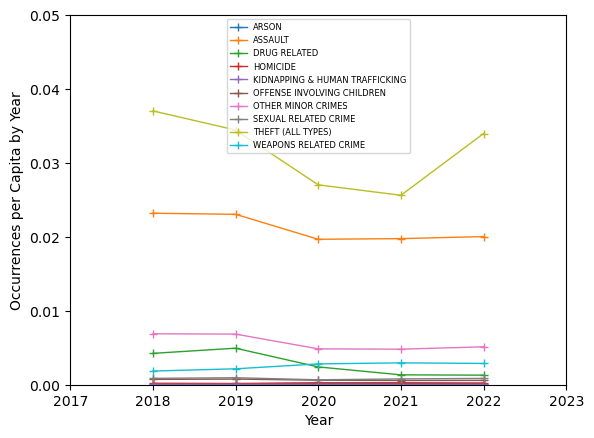

In [151]:
#time series for per-capita data by type (raw data)
years = crime_cleaned_df["Year"].unique()
plt.plot(years,arson_percap_years,marker="+",linewidth=1,label="ARSON")
plt.plot(years,assault_percap_years,marker="+",linewidth=1,label="ASSAULT")
plt.plot(years,drug_percap_years,marker="+",linewidth=1,label="DRUG RELATED")
plt.plot(years,homicide_percap_years,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_percap_years,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.plot(years,children_percap_years,marker="+",linewidth=1,label="OFFENSE INVOLVING CHILDREN")
plt.plot(years,other_minor_percap_years,marker="+",linewidth=1,label="OTHER MINOR CRIMES")
plt.plot(years,sex_crime_percap_years,marker="+",linewidth=1,label="SEXUAL RELATED CRIME")
plt.plot(years,theft_percap_years,marker="+",linewidth=1,label="THEFT (ALL TYPES)")
plt.plot(years,weapon_percap_years,marker="+",linewidth=1,label="WEAPONS RELATED CRIME")
plt.xlim(2017,2023)
plt.ylim(0,0.05)
plt.xlabel("Year")
plt.ylabel("Occurrences per Capita by Year")
plt.legend(fontsize = 6,loc='upper center')
plt.savefig("Images/per_capita_all_types.png")
plt.show()

In [115]:
#find 'per capita' counts by primary type by year (per 100k people)
arson_1k = clean_types_df["ARSON"]/(clean_types_df["POPULATION"]/1000)
assault_1k = clean_types_df["ASSAULT"]/(clean_types_df["POPULATION"]/1000)
drug_1k = clean_types_df["DRUG RELATED"]/(clean_types_df["POPULATION"]/1000)
homicide_1k = clean_types_df["HOMICIDE"]/(clean_types_df["POPULATION"]/1000)
kidnap_1k = clean_types_df["KIDNAPPING & HUMAN TRAFFICKING"]/(clean_types_df["POPULATION"]/1000)
non_crim_1k = clean_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"]/(clean_types_df["POPULATION"]/1000)
children_1k = clean_types_df["OFFENSE INVOLVING CHILDREN"]/(clean_types_df["POPULATION"]/1000)
other_minor_1k = clean_types_df["OTHER MINOR CRIMES"]/(clean_types_df["POPULATION"]/1000)
sex_crime_1k = clean_types_df["SEXUAL RELATED CRIME"]/(clean_types_df["POPULATION"]/1000)
theft_1k = clean_types_df["THEFT (ALL TYPES)"]/(clean_types_df["POPULATION"]/1000)
weapon_1k = clean_types_df["WEAPONS RELATED CRIME"]/(clean_types_df["POPULATION"]/1000)
totals_1k = clean_types_df["ALL CRIMES"]/(clean_types_df["POPULATION"]/1000)

In [18]:
#put the 'per 100k people' figures into a per capita DF
per_capita = {"ARSON":arson_1k,"ASSAULT":assault_1k,
               "DRUG RELATED":drug_1k,"HOMICIDE":homicide_1k,
               "KIDNAPPING & HUMAN TRAFFICKING":kidnap_1k,
               "NON-CRIMINAL (SUBJECT SPECIFIED)":non_crim_1k,
               "OFFENSE INVOLVING CHILDREN":children_1k,
               "OTHER MINOR CRIMES":other_minor_1k,
               "SEXUAL RELATED CRIME":sex_crime_1k,
               "THEFT (ALL TYPES)":theft_1k,
               "WEAPONS RELATED CRIME":weapon_1k,
               "ALL CRIMES":totals_1k}
per_capita_df = pd.DataFrame(per_capita)

#format some values
per_capita_df["ARSON"] = per_capita_df["ARSON"].map("{:,.2f}".format)
per_capita_df["ASSAULT"] = per_capita_df["ASSAULT"].map("{:,.2f}".format)
per_capita_df["DRUG RELATED"] = per_capita_df["DRUG RELATED"].map("{:,.2f}".format)
per_capita_df["HOMICIDE"] = per_capita_df["HOMICIDE"].map("{:,.2f}".format)
per_capita_df["NON-CRIMINAL (SUBJECT SPECIFIED)"] = per_capita_df["NON-CRIMINAL (SUBJECT SPECIFIED)"].map("{:,.2f}".format)
per_capita_df["OFFENSE INVOLVING CHILDREN"] = per_capita_df["OFFENSE INVOLVING CHILDREN"].map("{:,.2f}".format)
per_capita_df["OTHER MINOR CRIMES"] = per_capita_df["OTHER MINOR CRIMES"].map("{:,.2f}".format)
per_capita_df["SEXUAL RELATED CRIME"] = per_capita_df["SEXUAL RELATED CRIME"].map("{:,.2f}".format)
per_capita_df["THEFT (ALL TYPES)"] = per_capita_df["THEFT (ALL TYPES)"].map("{:,.2f}".format)
per_capita_df["WEAPONS RELATED CRIME"] = per_capita_df["WEAPONS RELATED CRIME"].map("{:,.2f}".format)
per_capita_df["ALL CRIMES"] = per_capita_df["ALL CRIMES"].map("{:,.2f}".format)

per_capita_df

,ARSON,ASSAULT,DRUG RELATED,HOMICIDE,KIDNAPPING & HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),OFFENSE INVOLVING CHILDREN,OTHER MINOR CRIMES,SEXUAL RELATED CRIME,THEFT (ALL TYPES),WEAPONS RELATED CRIME,ALL CRIMES
2018,0.12,23.20,4.24,0.20,0.059164,0.00,0.72,6.89,0.86,37.04,1.85,86.56
2019,0.12,23.05,4.94,0.17,0.060368,nan,0.76,6.85,0.94,34.46,2.16,84.42
2020,0.19,19.68,2.41,0.26,0.040624,nan,0.61,4.85,0.67,27.04,2.82,68.02
2021,0.17,19.76,1.34,0.26,0.030565,nan,0.57,4.81,0.78,25.63,2.96,65.42
2022,0.14,20.04,1.29,0.24,0.042397,nan,0.58,5.13,0.85,33.99,2.88,75.22
Average,0.15,21.14,2.84,0.23,0.046572,0.00,0.65,5.70,0.82,31.62,2.53,75.90


In [146]:
#convert the per-year figures by category into occurences per 1k people (excluding the average)
#first convert the population list to an array so you can perform operations on it
population = np.array(population)
arson_per_1k_years = years_types_df["ARSON"]/(population/1000)
assault_per_1k_years = years_types_df["ASSAULT"]/(population/1000)
drug_per_1k_years = years_types_df["DRUG RELATED"]/(population/1000)
homicide_per_1k_years = years_types_df["HOMICIDE"]/(population/1000)
kidnap_per_1k_years = years_types_df["KIDNAPPING & HUMAN TRAFFICKING"]/(population/1000)
non_crim_per_1k_years = years_types_df["NON-CRIMINAL (SUBJECT SPECIFIED)"]/(population/1000)
children_per_1k_years = years_types_df["OFFENSE INVOLVING CHILDREN"]/(population/1000)
other_minor_per_1k_years = years_types_df["OTHER MINOR CRIMES"]/(population/1000)
sex_crime_per_1k_years = years_types_df["SEXUAL RELATED CRIME"]/(population/1000)
theft_per_1k_years = years_types_df["THEFT (ALL TYPES)"]/(population/1000)
weapon_per_1k_years = years_types_df["WEAPONS RELATED CRIME"]/(population/1000)


2018    37.039785
2019    34.455034
2020    27.037989
2021    25.628006
2022    33.985421
Name: THEFT (ALL TYPES), dtype: float64

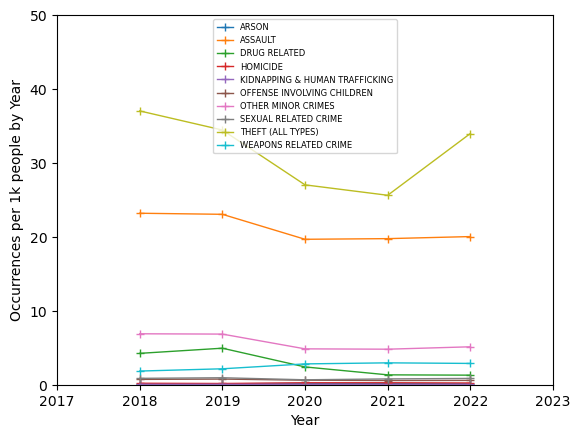

In [150]:
#add time series with the figures per 1k people by year (excluding the average)
years = crime_cleaned_df["Year"].unique()
plt.plot(years,arson_per_1k_years,marker="+",linewidth=1,label="ARSON")
plt.plot(years,assault_per_1k_years,marker="+",linewidth=1,label="ASSAULT")
plt.plot(years,drug_per_1k_years,marker="+",linewidth=1,label="DRUG RELATED")
plt.plot(years,homicide_per_1k_years,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_per_1k_years,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.plot(years,children_per_1k_years,marker="+",linewidth=1,label="OFFENSE INVOLVING CHILDREN")
plt.plot(years,other_minor_per_1k_years,marker="+",linewidth=1,label="OTHER MINOR CRIMES")
plt.plot(years,sex_crime_per_1k_years,marker="+",linewidth=1,label="SEXUAL RELATED CRIME")
plt.plot(years,theft_per_1k_years,marker="+",linewidth=1,label="THEFT (ALL TYPES)")
plt.plot(years,weapon_per_1k_years,marker="+",linewidth=1,label="WEAPONS RELATED CRIME")
plt.xlim(2017,2023)
plt.ylim(0,50)
plt.xlabel("Year")
plt.ylabel("Occurrences per 1k people by Year")
plt.legend(fontsize = 6,loc='upper center')
plt.savefig("Images/per_1k_all_types.png")
plt.show()

In [19]:
#add tables for heinous crimes
#total counts table
heinous_counts = {"ARSON":arson,"HOMICIDE":homicide,
                  "KIDNAPPING & HUMAN TRAFFICKING":kidnap,
                  "ALL CRIMES":crime_counts}
heinous_table = pd.DataFrame(heinous_counts)
heinous_table

,ARSON,HOMICIDE,KIDNAPPING & HUMAN TRAFFICKING,ALL CRIMES
2018,368.0,598.0,177.0,258975.0
2019,365.0,499.0,182.0,254521.0
2020,574.0,789.0,122.0,204272.0
2021,518.0,804.0,93.0,199067.0
2022,412.0,716.0,129.0,228867.0
Average,447.4,681.2,140.6,229140.4


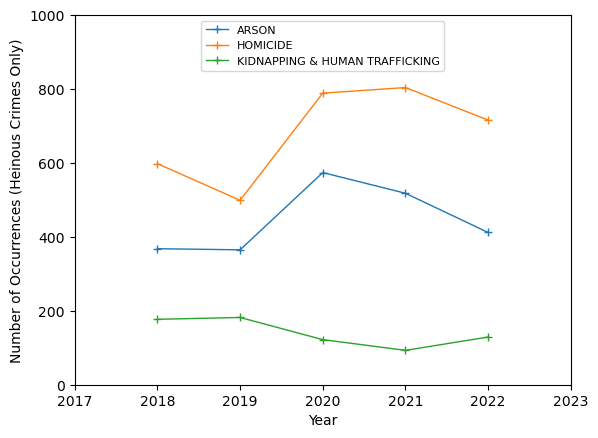

In [155]:
#add timeseries for just the heinous crimes
plt.plot(years,arson_count,marker="+",linewidth=1,label="ARSON")
plt.plot(years,homicide_count,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_count,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.xlim(2017,2023)
plt.ylim(0,1000)
plt.xlabel("Year")
plt.ylabel("Number of Occurrences (Heinous Crimes Only)")
plt.legend(fontsize = 8,loc='upper center')
plt.savefig("Images/heinous_count.png")
plt.show()

In [160]:
#percentage table
heinous_percent = {"ARSON":arson_percent,"HOMICIDE":homicide_percent,
                  "KIDNAPPING & HUMAN TRAFFICKING":kidnap_percent,}
heinous_percent_table = pd.DataFrame(heinous_percent)

#format the values
heinous_percent_table["ARSON"] = heinous_percent_table["ARSON"].map("{:,.4f}%".format)
heinous_percent_table["HOMICIDE"] = heinous_percent_table["HOMICIDE"].map("{:,.4f}%".format)
heinous_percent_table["KIDNAPPING & HUMAN TRAFFICKING"] = heinous_percent_table["KIDNAPPING & HUMAN TRAFFICKING"].map("{:,.4f}%".format)

heinous_percent_table

,ARSON,HOMICIDE,KIDNAPPING & HUMAN TRAFFICKING
2018,0.1421%,0.2309%,0.0683%
2019,0.1434%,0.1961%,0.0715%
2020,0.2810%,0.3862%,0.0597%
2021,0.2602%,0.4039%,0.0467%
2022,0.1800%,0.3128%,0.0564%
Totals,0.1953%,0.2973%,0.0614%


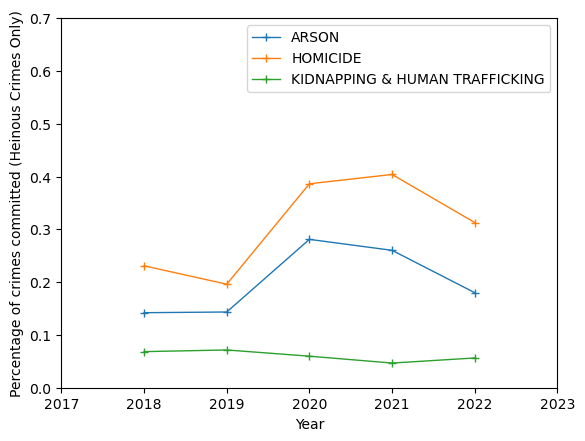

In [174]:
#add time series for the percentages by category for heinous crimes
plt.plot(years,arson_percent_years,marker="+",linewidth=1,label="ARSON")
plt.plot(years,homicide_percent_years,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_percent_years,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.xlim(2017,2023)
plt.ylim(0,0.7)
plt.xlabel("Year")
plt.ylabel("Percentage of crimes committed (Heinous Crimes Only)")
plt.legend(fontsize = 10,loc='best')
plt.savefig("Images/heinous_percent.png")
plt.show()

In [165]:
#create a table for the raw per-capita data for heinous crimes
heinous_per_cap = {"ARSON":arson_per_capita,"HOMICIDE":homicide_per_capita,
                  "KIDNAPPING & HUMAN TRAFFICKING":kidnap_per_capita,
                  "ALL CRIMES":totals_per_capita}
heinous_per_cap_table = pd.DataFrame(heinous_per_cap)
heinous_per_cap_table

,ARSON,HOMICIDE,KIDNAPPING & HUMAN TRAFFICKING,ALL CRIMES
2018,0.000123,0.000200,0.000059,0.086564
2019,0.000121,0.000166,0.000060,0.084423
2020,0.000191,0.000263,0.000041,0.068019
2021,0.000170,0.000264,0.000031,0.065425
2022,0.000135,0.000235,0.000042,0.075219
Average,0.000148,0.000226,0.000047,0.075899


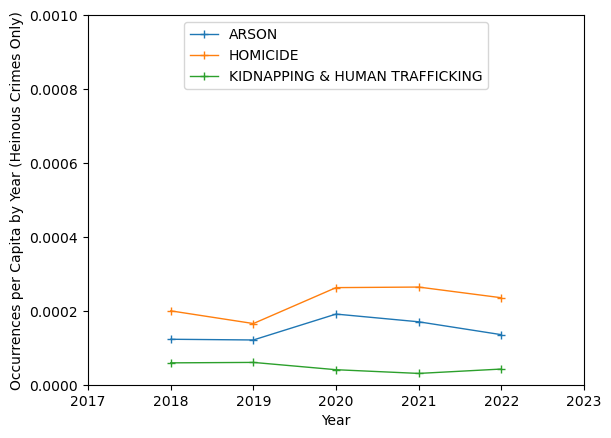

In [172]:
#add a time series for per-capita data for heinous crimes only
plt.plot(years,arson_percap_years,marker="+",linewidth=1,label="ARSON")
plt.plot(years,homicide_percap_years,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_percap_years,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.xlim(2017,2023)
plt.ylim(0,0.001)
plt.xlabel("Year")
plt.ylabel("Occurrences per Capita by Year (Heinous Crimes Only)")
plt.legend(fontsize = 10,loc='upper center')
plt.savefig("Images/per_capita_heinous.png")
plt.show()

In [22]:
#create table for the per-capita (per 1k people) for heinous crimes
heinous_per_1k = {"ARSON":arson_1k,"HOMICIDE":homicide_1k,
                  "KIDNAPPING & HUMAN TRAFFICKING":kidnap_1k,
                  "ALL CRIMES":totals_1k}
heinous_per_1k_table = pd.DataFrame(heinous_per_1k)
heinous_per_1k_table

,ARSON,HOMICIDE,KIDNAPPING & HUMAN TRAFFICKING,ALL CRIMES
2018,0.123007,0.199886,0.059164,86.564437
2019,0.121068,0.165515,0.060368,84.423058
2020,0.191133,0.262725,0.040624,68.019360
2021,0.170244,0.264240,0.030565,65.424738
2022,0.135407,0.235318,0.042397,75.218713
Average,0.148194,0.225637,0.046572,75.899191


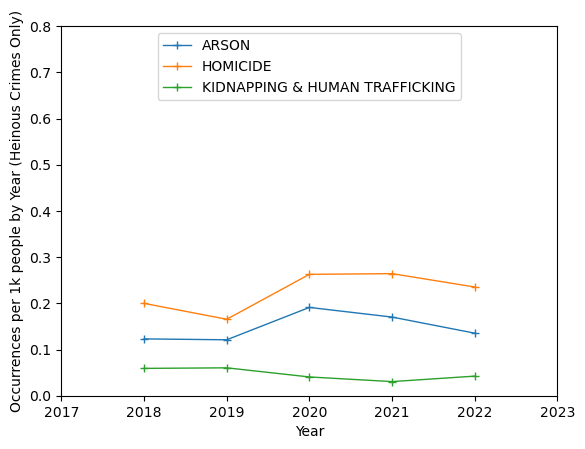

In [177]:
#add a time series for heinous crimes committed per 1k people by year
plt.plot(years,arson_per_1k_years,marker="+",linewidth=1,label="ARSON")
plt.plot(years,homicide_per_1k_years,marker="+",linewidth=1,label="HOMICIDE")
plt.plot(years,kidnap_per_1k_years,marker="+",linewidth=1,label="KIDNAPPING & HUMAN TRAFFICKING")
plt.xlim(2017,2023)
plt.ylim(0,0.8)
plt.xlabel("Year")
plt.ylabel("Occurrences per 1k people by Year (Heinous Crimes Only)")
plt.legend(fontsize = 10,loc='upper center')
plt.savefig("Images/per_1k_heinous.png")
plt.show()